<a href="https://colab.research.google.com/github/1070rahul/1070rahul/blob/main/imdb_movie_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
# importing libraries and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import matplotlib
matplotlib.rcParams['figure.figsize']=(12,6)

In [317]:
df = pd.read_csv('/content/Merged_IMDBTop400.csv', encoding = 'latin1')

In [318]:
df.head()

,Genre,Movie Name,Year,Rating,Votes,Type,Detail/Main Story,Metascore
0,Adventure,1. Echo,2023?2024,6.1?(24K),"Votes23,699",TV Mini Series,"Maya Lopez must face her past, reconnect with ...",NaN
1,Adventure,2. Society of the Snow,2023,7.9?(64K),"Votes64,320",NaN,The flight of a rugby team crashes on a glacie...,72.0
2,Adventure,3. Percy Jackson and the Olympians,2023?,7.4?(18K),"Votes18,020",TV Series,Demigod Percy Jackson leads a quest across Ame...,NaN
3,Adventure,4. Game of Thrones,2011?2019,9.2?(2.2M),"Votes2,247,841",TV Series,Nine noble families fight for control over the...,NaN
4,Adventure,5. Napoleon,2023,6.5?(95K),"Votes95,398",NaN,An epic that details the checkered rise and fa...,64.0


In [319]:
df.shape

(6800, 8)

In [320]:
df.columns

Index(['Genre', 'Movie Name', 'Year', 'Rating', 'Votes', 'Type',
       'Detail/Main Story', 'Metascore'],
      dtype='object')

In [321]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6795    False
6796    False
6797    False
6798    False
6799    False
Length: 6800, dtype: bool

In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6800 entries, 0 to 6799
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Genre              6800 non-null   object 
 1   Movie Name         6800 non-null   object 
 2   Year               6800 non-null   object 
 3   Rating             6795 non-null   object 
 4   Votes              6785 non-null   object 
 5   Type               2988 non-null   object 
 6   Detail/Main Story  6789 non-null   object 
 7   Metascore          3498 non-null   float64
dtypes: float64(1), object(7)
memory usage: 425.1+ KB


In [323]:
df.isnull().sum()

Genre                   0
Movie Name              0
Year                    0
Rating                  5
Votes                  15
Type                 3812
Detail/Main Story      11
Metascore            3302
dtype: int64

In [324]:
df.describe()

,Metascore
count,3498.000000
mean,63.285592
std,15.602014
min,12.000000
25%,52.000000
50%,64.000000
75%,75.000000
max,98.000000


## Observations:
1. I found ? symbol which is not necessary in the fields
2. The datatype of some fields are not correct so need to change that too.
3. Found missing values too.


# DATA CLEANING

In [325]:
df.head(2)

,Genre,Movie Name,Year,Rating,Votes,Type,Detail/Main Story,Metascore
0,Adventure,1. Echo,2023?2024,6.1?(24K),"Votes23,699",TV Mini Series,"Maya Lopez must face her past, reconnect with ...",NaN
1,Adventure,2. Society of the Snow,2023,7.9?(64K),"Votes64,320",NaN,The flight of a rugby team crashes on a glacie...,72.0


In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6800 entries, 0 to 6799
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Genre              6800 non-null   object 
 1   Movie Name         6800 non-null   object 
 2   Year               6800 non-null   object 
 3   Rating             6795 non-null   object 
 4   Votes              6785 non-null   object 
 5   Type               2988 non-null   object 
 6   Detail/Main Story  6789 non-null   object 
 7   Metascore          3498 non-null   float64
dtypes: float64(1), object(7)
memory usage: 425.1+ KB


In [70]:
for col in df.columns:
  print('{}:{}'.format(col, df[col].unique()))

Genre:['Adventure' 'Animation' 'Biography' 'Comedy' 'Crime' 'Documentary'
 'Drama' 'Family' 'Fantasy' 'Game-Show' 'History' 'Horror' 'Mystery'
 'Romance' 'Sci-Fi' 'Thriller' 'War']
Movie Name:['1. Echo' '2. Society of the Snow' '3. Percy Jackson and the Olympians'
 ... '398. Ayla' '399. The Lost Battalion' '400. Stalingrad']
Year:['2023?2024' '2023' '2023?' '2011?2019' '2005?' '2022?' '2013?'
 '2013?2020' '2013?2023' '2020?' '2021?' '2021' '2019?' '2014' '2004?2010'
 '2022' '2001' '2012' '2000' '2016' '2021?2023' '2010?2013' '2010'
 '2001?2011' '2015' '2014?2023' '2011?2018' '2017?2024' '2017?2022' '2013'
 '2005' '2022?2023' '2003' '2018' '2002?2003' '2009' '2019?2024' '2019'
 '2005?2008' '2018?2024' '2017' '2011' '2018?2023' '2012?2020' '2002'
 '2019?2023' '2006' '2020?2023' '2004' '2018?2022' '2020' '2008?2020'
 '2007' '2004?2009' '2014?2017' '2011?2014' '2010?2018' '2019?2022'
 '2001?2005' '2007?2017' '2016?' '2008' '2021?2024' '2002?2007'
 '2007?2012' '2017?2020' '2015?2021' '2012?

In [327]:
df['Year']= df['Year'].str.replace('?','-')
df['Year']= df['Year'].str.replace('Episode:','NaN')

In [328]:
df.head()

,Genre,Movie Name,Year,Rating,Votes,Type,Detail/Main Story,Metascore
0,Adventure,1. Echo,2023-2024,6.1?(24K),"Votes23,699",TV Mini Series,"Maya Lopez must face her past, reconnect with ...",NaN
1,Adventure,2. Society of the Snow,2023,7.9?(64K),"Votes64,320",NaN,The flight of a rugby team crashes on a glacie...,72.0
2,Adventure,3. Percy Jackson and the Olympians,2023-,7.4?(18K),"Votes18,020",TV Series,Demigod Percy Jackson leads a quest across Ame...,NaN
3,Adventure,4. Game of Thrones,2011-2019,9.2?(2.2M),"Votes2,247,841",TV Series,Nine noble families fight for control over the...,NaN
4,Adventure,5. Napoleon,2023,6.5?(95K),"Votes95,398",NaN,An epic that details the checkered rise and fa...,64.0


In [124]:
for col in df.columns:
  print('{}:{}'.format(col,df[col].unique()))

Genre:['Adventure' 'Animation' 'Biography' 'Comedy' 'Crime' 'Documentary'
 'Drama' 'Family' 'Fantasy' 'Game-Show' 'History' 'Horror' 'Mystery'
 'Romance' 'Sci-Fi' 'Thriller' 'War']
Movie Name:['Echo' 'Society of the Snow' 'Percy Jackson and the Olympians' ... 'Ayla'
 'The Lost Battalion' 'Stalingrad']
Year:['2023-2024' '2023' '2023-' '2011-2019' '2005-' '2022-' '2013-'
 '2013-2020' '2013-2023' '2020-' '2021-' '2021' '2019-' '2014' '2004-2010'
 '2022' '2001' '2012' '2000' '2016' '2021-2023' '2010-2013' '2010'
 '2001-2011' '2015' '2014-2023' '2011-2018' '2017-2024' '2017-2022' '2013'
 '2005' '2022-2023' '2003' '2018' '2002-2003' '2009' '2019-2024' '2019'
 '2005-2008' '2018-2024' '2017' '2011' '2018-2023' '2012-2020' '2002'
 '2019-2023' '2006' '2020-2023' '2004' '2018-2022' '2020' '2008-2020'
 '2007' '2004-2009' '2014-2017' '2011-2014' '2010-2018' '2019-2022'
 '2001-2005' '2007-2017' '2016-' '2008' '2021-2024' '2002-2007'
 '2007-2012' '2017-2020' '2015-2021' '2012-2016' '2004-2023' '2009-

In [329]:
df.head()

,Genre,Movie Name,Year,Rating,Votes,Type,Detail/Main Story,Metascore
0,Adventure,1. Echo,2023-2024,6.1?(24K),"Votes23,699",TV Mini Series,"Maya Lopez must face her past, reconnect with ...",NaN
1,Adventure,2. Society of the Snow,2023,7.9?(64K),"Votes64,320",NaN,The flight of a rugby team crashes on a glacie...,72.0
2,Adventure,3. Percy Jackson and the Olympians,2023-,7.4?(18K),"Votes18,020",TV Series,Demigod Percy Jackson leads a quest across Ame...,NaN
3,Adventure,4. Game of Thrones,2011-2019,9.2?(2.2M),"Votes2,247,841",TV Series,Nine noble families fight for control over the...,NaN
4,Adventure,5. Napoleon,2023,6.5?(95K),"Votes95,398",NaN,An epic that details the checkered rise and fa...,64.0


## Observation:
1. in the year column ? is replaced by - but not from the single value of year
2. need to rectify this


In [330]:
# creating a function to remove the - from the single value of year
def process_year(value):
    parts = value.split('?')
    if len(parts) == 2:  # If there are two parts separated by '?'
        return '-'.join(parts)  # Replace '?' with '-'
    else:
        return parts[0]
# apply this function to the dataframe
df['Year'] = df['Year'].apply(process_year)

In [331]:
df.head()

,Genre,Movie Name,Year,Rating,Votes,Type,Detail/Main Story,Metascore
0,Adventure,1. Echo,2023-2024,6.1?(24K),"Votes23,699",TV Mini Series,"Maya Lopez must face her past, reconnect with ...",NaN
1,Adventure,2. Society of the Snow,2023,7.9?(64K),"Votes64,320",NaN,The flight of a rugby team crashes on a glacie...,72.0
2,Adventure,3. Percy Jackson and the Olympians,2023-,7.4?(18K),"Votes18,020",TV Series,Demigod Percy Jackson leads a quest across Ame...,NaN
3,Adventure,4. Game of Thrones,2011-2019,9.2?(2.2M),"Votes2,247,841",TV Series,Nine noble families fight for control over the...,NaN
4,Adventure,5. Napoleon,2023,6.5?(95K),"Votes95,398",NaN,An epic that details the checkered rise and fa...,64.0


## Observation
It still does not work.
Let me know if there is any other method

In [334]:
# Let's give it one more try

df['Year'] = df['Year'].str.replace(r'(\d+)\?(\d+)', r'\1-\2')
df['Year'] = df['Year'].str.replace(r'(\d+)\?', r'\1 ')

In [335]:
df.head()

,Genre,Movie Name,Year,Rating,Votes,Type,Detail/Main Story,Metascore
0,Adventure,1. Echo,2023-2024,6.1?(24K),"Votes23,699",TV Mini Series,"Maya Lopez must face her past, reconnect with ...",NaN
1,Adventure,2. Society of the Snow,2023,7.9?(64K),"Votes64,320",NaN,The flight of a rugby team crashes on a glacie...,72.0
2,Adventure,3. Percy Jackson and the Olympians,2023-,7.4?(18K),"Votes18,020",TV Series,Demigod Percy Jackson leads a quest across Ame...,NaN
3,Adventure,4. Game of Thrones,2011-2019,9.2?(2.2M),"Votes2,247,841",TV Series,Nine noble families fight for control over the...,NaN
4,Adventure,5. Napoleon,2023,6.5?(95K),"Votes95,398",NaN,An epic that details the checkered rise and fa...,64.0


No does not change. If someone pls reach me

## Observation
1. Rating column and vote column has values in the form which is unwanted.
2. Let's clean and do some feature engineeing

In [138]:
df.head(1)

,Genre,Movie Name,Year,Rating,Votes,Type,Detail/Main Story,Metascore
0,Adventure,1. Echo,2023?2024,6.1?(24K),"Votes23,699",TV Mini Series,"Maya Lopez must face her past, reconnect with ...",NaN


In [336]:
# Extracting values from rating and creating new columns

df['rating'] = df['Rating'].str.extract(r'([+-]?\d*\.\d+|\d+)', expand = True).astype(float)
df['rating_count'] = df['Rating'].str.extract(r'\((\d+K)\)', expand = True)


In [337]:
df.head()

,Genre,Movie Name,Year,Rating,Votes,Type,Detail/Main Story,Metascore,rating,rating_count
0,Adventure,1. Echo,2023-2024,6.1?(24K),"Votes23,699",TV Mini Series,"Maya Lopez must face her past, reconnect with ...",NaN,6.1,24K
1,Adventure,2. Society of the Snow,2023,7.9?(64K),"Votes64,320",NaN,The flight of a rugby team crashes on a glacie...,72.0,7.9,64K
2,Adventure,3. Percy Jackson and the Olympians,2023-,7.4?(18K),"Votes18,020",TV Series,Demigod Percy Jackson leads a quest across Ame...,NaN,7.4,18K
3,Adventure,4. Game of Thrones,2011-2019,9.2?(2.2M),"Votes2,247,841",TV Series,Nine noble families fight for control over the...,NaN,9.2,NaN
4,Adventure,5. Napoleon,2023,6.5?(95K),"Votes95,398",NaN,An epic that details the checkered rise and fa...,64.0,6.5,95K


In [338]:
df['rating_count(K)'] = df['rating_count'].str.replace('K', '')


In [281]:
df.head()

,Genre,Movie Name,Year,Rating,Votes,Type,Metascore,rating,rating_count,rating_count(K)
0,Adventure,1. Echo,2023-2024,6.1?(24K),"Votes23,699",TV Mini Series,NaN,6.1,24K,24
1,Adventure,2. Society of the Snow,2023,7.9?(64K),"Votes64,320",NaN,72.0,7.9,64K,64
2,Adventure,3. Percy Jackson and the Olympians,2023-,7.4?(18K),"Votes18,020",TV Series,NaN,7.4,18K,18
3,Adventure,4. Game of Thrones,2011-2019,9.2?(2.2M),"Votes2,247,841",TV Series,NaN,9.2,NaN,NaN
4,Adventure,5. Napoleon,2023,6.5?(95K),"Votes95,398",NaN,64.0,6.5,95K,95


## So here I create two columns rating and rating_count
1. Note: rating_count is in K Now and those values which were in millions are not much so It became NaN

In [339]:
df.columns

Index(['Genre', 'Movie Name', 'Year', 'Rating', 'Votes', 'Type',
       'Detail/Main Story', 'Metascore', 'rating', 'rating_count',
       'rating_count(K)'],
      dtype='object')

In [340]:
df.drop(columns = ['Rating'], inplace = True)

In [342]:
df.drop(columns = ['Detail/Main Story'], inplace = True)

In [343]:
df.head()

,Genre,Movie Name,Year,Votes,Type,Metascore,rating,rating_count,rating_count(K)
0,Adventure,1. Echo,2023-2024,"Votes23,699",TV Mini Series,NaN,6.1,24K,24
1,Adventure,2. Society of the Snow,2023,"Votes64,320",NaN,72.0,7.9,64K,64
2,Adventure,3. Percy Jackson and the Olympians,2023-,"Votes18,020",TV Series,NaN,7.4,18K,18
3,Adventure,4. Game of Thrones,2011-2019,"Votes2,247,841",TV Series,NaN,9.2,NaN,NaN
4,Adventure,5. Napoleon,2023,"Votes95,398",NaN,64.0,6.5,95K,95


In [344]:
# In vote column let's remove Votes and , from the value
df['Votes'] = df['Votes'].str.replace('Votes','')
df['Votes'] = df['Votes'].str.replace(',','')

In [345]:
df.head()

,Genre,Movie Name,Year,Votes,Type,Metascore,rating,rating_count,rating_count(K)
0,Adventure,1. Echo,2023-2024,23699,TV Mini Series,NaN,6.1,24K,24
1,Adventure,2. Society of the Snow,2023,64320,NaN,72.0,7.9,64K,64
2,Adventure,3. Percy Jackson and the Olympians,2023-,18020,TV Series,NaN,7.4,18K,18
3,Adventure,4. Game of Thrones,2011-2019,2247841,TV Series,NaN,9.2,NaN,NaN
4,Adventure,5. Napoleon,2023,95398,NaN,64.0,6.5,95K,95


In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6800 entries, 0 to 6799
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Genre            6800 non-null   object 
 1   Movie Name       6800 non-null   object 
 2   Year             6800 non-null   object 
 3   Votes            6785 non-null   object 
 4   Type             2988 non-null   object 
 5   Metascore        3498 non-null   float64
 6   rating           6795 non-null   float64
 7   rating_count     5299 non-null   object 
 8   rating_count(K)  5299 non-null   object 
dtypes: float64(2), object(7)
memory usage: 478.2+ KB


In [346]:
# There is some unwanted character in the MOvie name character. lets remove it
df['Movie Name'] = df['Movie Name'].str.replace(r'^\d+\.\s', '')


In [347]:
df.head()

,Genre,Movie Name,Year,Votes,Type,Metascore,rating,rating_count,rating_count(K)
0,Adventure,Echo,2023-2024,23699,TV Mini Series,NaN,6.1,24K,24
1,Adventure,Society of the Snow,2023,64320,NaN,72.0,7.9,64K,64
2,Adventure,Percy Jackson and the Olympians,2023-,18020,TV Series,NaN,7.4,18K,18
3,Adventure,Game of Thrones,2011-2019,2247841,TV Series,NaN,9.2,NaN,NaN
4,Adventure,Napoleon,2023,95398,NaN,64.0,6.5,95K,95


In [348]:
df.isnull().sum()

Genre                 0
Movie Name            0
Year                  0
Votes                15
Type               3812
Metascore          3302
rating                5
rating_count       1501
rating_count(K)    1501
dtype: int64

# Observation:
1. as there are alot of missing value can't drop these columns
2. and we have to change the datatypes also.

In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6800 entries, 0 to 6799
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Genre            6800 non-null   object 
 1   Movie Name       6800 non-null   object 
 2   Year             6800 non-null   object 
 3   Votes            6785 non-null   object 
 4   Type             2988 non-null   object 
 5   Metascore        3498 non-null   float64
 6   rating           6795 non-null   float64
 7   rating_count     5299 non-null   object 
 8   rating_count(K)  5299 non-null   object 
dtypes: float64(2), object(7)
memory usage: 478.2+ KB


In [350]:
df.head()

,Genre,Movie Name,Year,Votes,Type,Metascore,rating,rating_count,rating_count(K)
0,Adventure,Echo,2023-2024,23699,TV Mini Series,NaN,6.1,24K,24
1,Adventure,Society of the Snow,2023,64320,NaN,72.0,7.9,64K,64
2,Adventure,Percy Jackson and the Olympians,2023-,18020,TV Series,NaN,7.4,18K,18
3,Adventure,Game of Thrones,2011-2019,2247841,TV Series,NaN,9.2,NaN,NaN
4,Adventure,Napoleon,2023,95398,NaN,64.0,6.5,95K,95


Let's handle he nan values in the object type columns

In [351]:
df['Votes'].fillna(0, inplace = True)
df['rating_count(K)'].fillna(0, inplace =True)
df['Type'].fillna('Unknown', inplace=True)

In [352]:
df['Votes'] = df['Votes'].astype(np.int32)
df['rating_count(K)'] = df['rating_count(K)'].astype(np.int32)

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6800 entries, 0 to 6799
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Genre              6800 non-null   object 
 1   Movie Name         6800 non-null   object 
 2   Year               6800 non-null   object 
 3   Votes              6800 non-null   int32  
 4   Type               6800 non-null   object 
 5   Detail/Main Story  6789 non-null   object 
 6   Metascore          6800 non-null   float64
 7   rating             6800 non-null   float64
 8   rating_count(K)    6800 non-null   int32  
dtypes: float64(2), int32(2), object(5)
memory usage: 425.1+ KB


 The type of Votes and rating_count is int
I made them int32 to save some space in the ram

In [293]:
df. columns

Index(['Genre', 'Movie Name', 'Year', 'Votes', 'Type', 'Metascore', 'rating',
       'rating_count', 'rating_count(K)'],
      dtype='object')

In [353]:
# filling those missing values with the mean in columns which have int and float type.

n_col = ['Metascore','rating']
for col in n_col:
  df[col] = pd.to_numeric(df[col])
  df.fillna({col:df[col].mean()}, inplace = True)

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6800 entries, 0 to 6799
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Genre              6800 non-null   object 
 1   Movie Name         6800 non-null   object 
 2   Year               6800 non-null   object 
 3   Votes              6800 non-null   int32  
 4   Type               2988 non-null   object 
 5   Detail/Main Story  6789 non-null   object 
 6   Metascore          6800 non-null   float64
 7   rating             6800 non-null   float64
 8   rating_count(K)    6800 non-null   int32  
dtypes: float64(2), int32(2), object(5)
memory usage: 425.1+ KB


In [354]:
df.drop(columns = ['rating_count'], inplace = True)

In [355]:
df.head()

,Genre,Movie Name,Year,Votes,Type,Metascore,rating,rating_count(K)
0,Adventure,Echo,2023-2024,23699,TV Mini Series,63.285592,6.1,24
1,Adventure,Society of the Snow,2023,64320,Unknown,72.000000,7.9,64
2,Adventure,Percy Jackson and the Olympians,2023-,18020,TV Series,63.285592,7.4,18
3,Adventure,Game of Thrones,2011-2019,2247841,TV Series,63.285592,9.2,0
4,Adventure,Napoleon,2023,95398,Unknown,64.000000,6.5,95


In [356]:
df.shape

(6800, 8)

In [390]:
df.head()

,Genre,Movie Name,Year,Votes,Type,Metascore,rating,rating_count(K)
0,Adventure,Echo,2023-2024,23699,TV Mini Series,63.285592,6.1,24
1,Adventure,Society of the Snow,2023,64320,Unknown,72.000000,7.9,64
2,Adventure,Percy Jackson and the Olympians,2023-,18020,TV Series,63.285592,7.4,18
3,Adventure,Game of Thrones,2011-2019,2247841,TV Series,63.285592,9.2,0
4,Adventure,Napoleon,2023,95398,Unknown,64.000000,6.5,95


In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6800 entries, 0 to 6799
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Genre            6800 non-null   object 
 1   Movie Name       6800 non-null   object 
 2   Year             6800 non-null   object 
 3   Votes            6800 non-null   int32  
 4   Type             6800 non-null   object 
 5   Metascore        6800 non-null   float64
 6   rating           6800 non-null   float64
 7   rating_count(K)  6800 non-null   int32  
dtypes: float64(2), int32(2), object(4)
memory usage: 372.0+ KB


## Observation.
1. So we are good to go

# Data visualization and analysis
Let's find some correlation between numerical columns

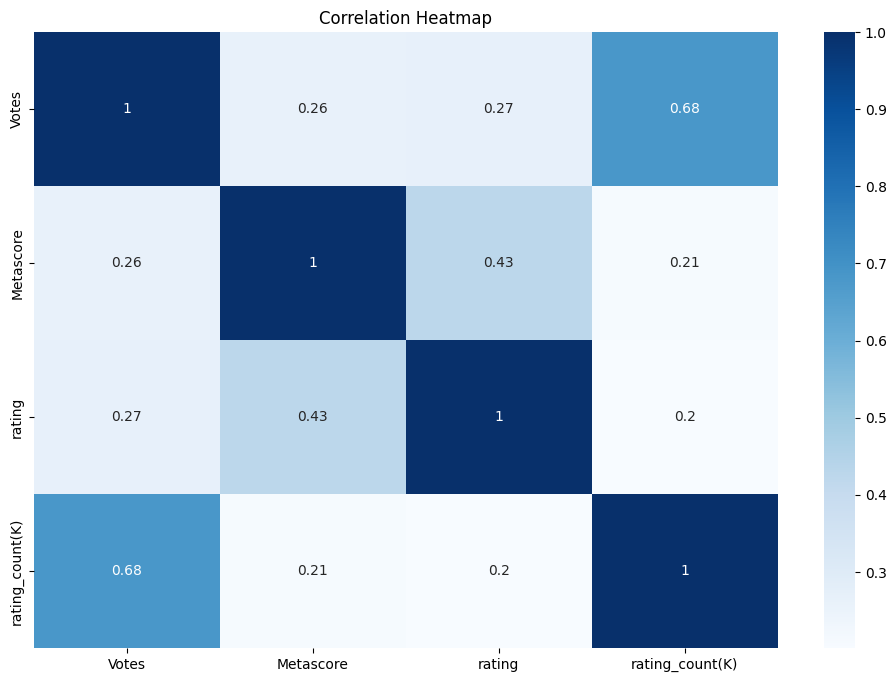

In [359]:
# Selecting only numerical column
num_col = df.select_dtypes(include = ['float64','int32'])

# calculating corelation matrix
corr_matrix = num_col.corr()

#ploting correlation heatmap
plt.figure(figsize =(12,8))
sns.heatmap(corr_matrix, cmap = 'Blues', annot = True,cbar=True)
plt.title('Correlation Heatmap')
plt.show()

## Which genre has got the highest rating?

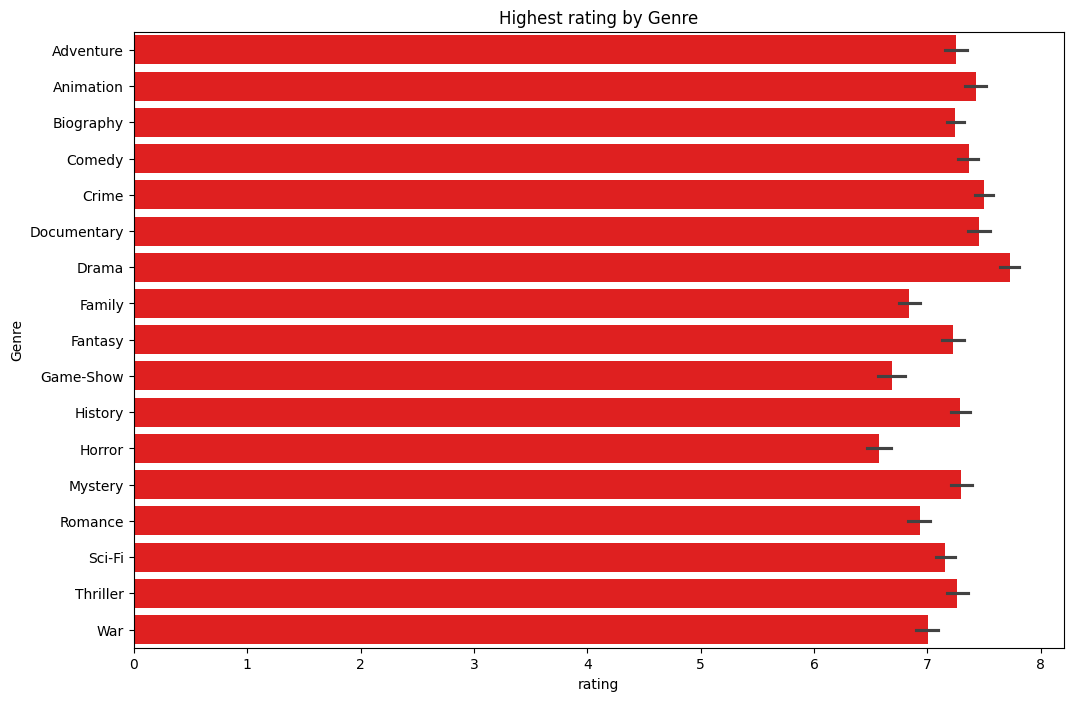

In [378]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'rating', y = 'Genre', data = df , color = 'r')
plt.title('Highest rating by Genre')
plt.show()

Text(0.5, 1.0, 'Votes by Type')

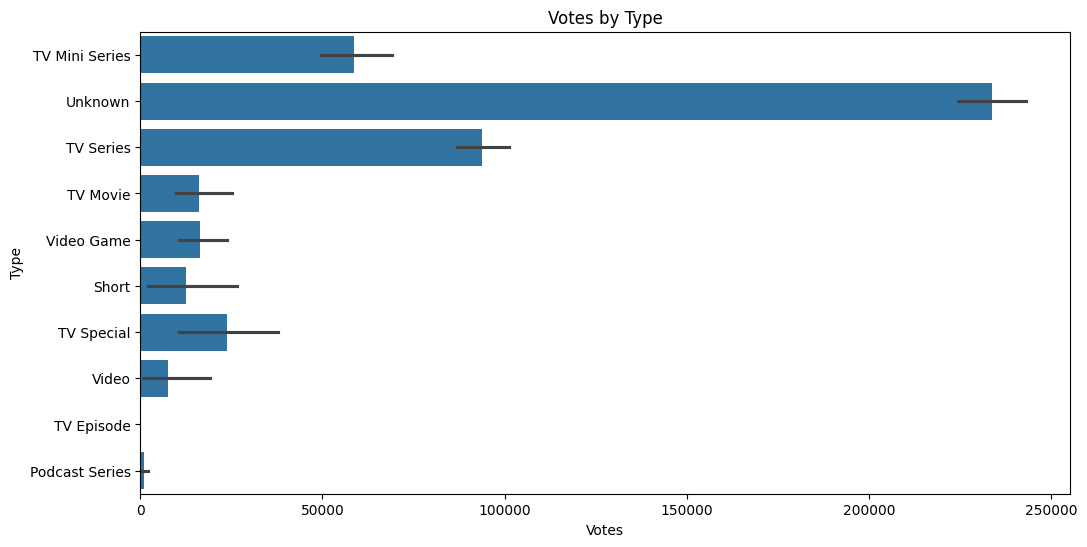

In [374]:

sns.barplot(x='Votes',y='Type',data=df)
plt.title('Votes by Type')


# How many Unknown types of content is there?

In [380]:
df.Type.value_counts()

Unknown           3812
TV Series         2475
TV Mini Series     411
TV Movie            35
Video Game          29
TV Special          14
Short               11
Video                9
TV Episode           2
Podcast Series       2
Name: Type, dtype: int64

There are 3812 unknown types.

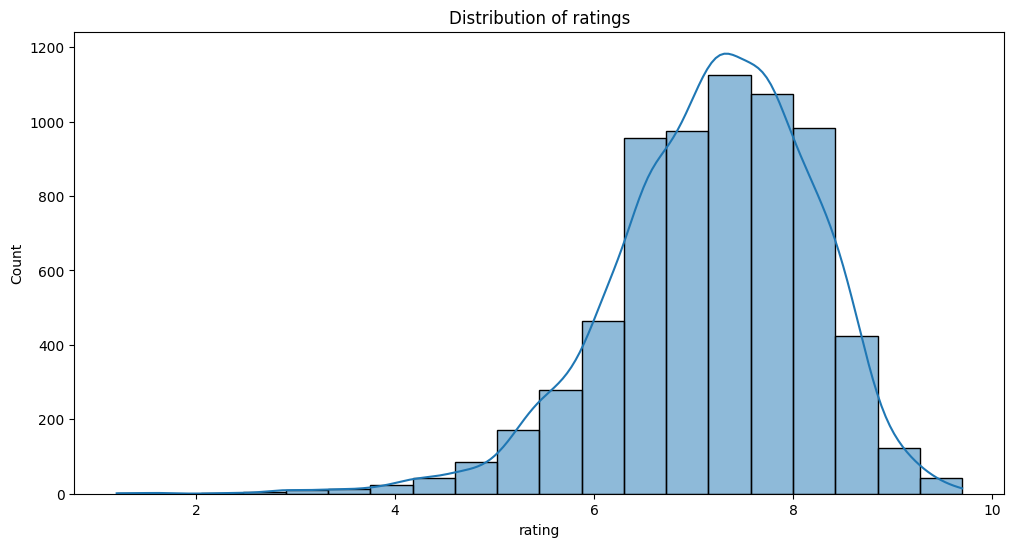

In [386]:
sns.histplot(df['rating'], bins=20, kde=True)
plt.title('Distribution of ratings')
plt.show()

In [387]:
df.rating.skew()

-0.7020371500852453

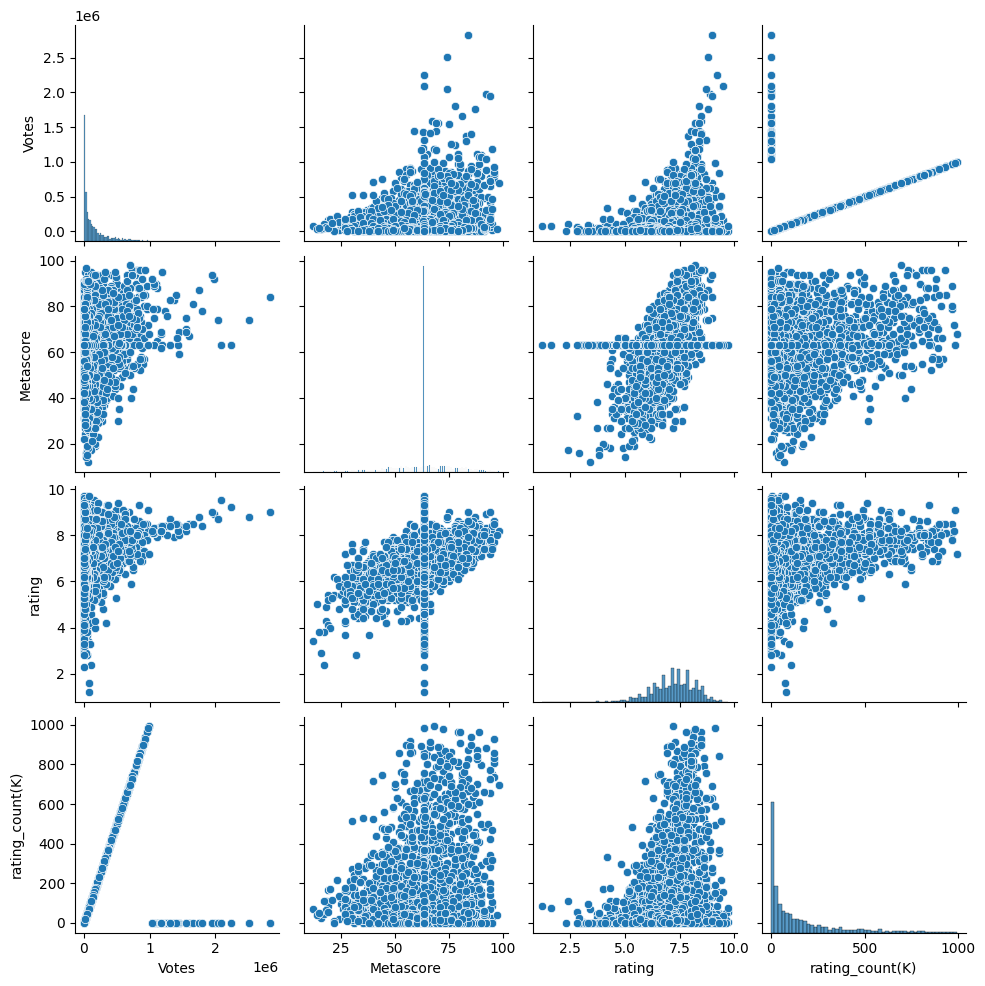

In [388]:
sns.pairplot(df)